Q1.Criminal investigation

1.1.1

In [1]:
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_excel('phone_data.xlsx')
df

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
...,...,...,...,...,...,...,...,...
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00
336,10-15-2019,11:05:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00


1.1.2.1

In [2]:
# count number of calls from each numbers and sort by descending order
call_count = df[df['Call type'] == 'Outgoing'].groupby('Number called (to/from)')['Number called (to/from)'].count().sort_values(ascending=False)
call_count

Number called (to/from)
A_1    111
A_5     48
B_3     28
A_4     12
B_2      4
C_4      3
B_4      3
E_1      3
E_3      3
D_3      2
A_2      2
C_5      2
G_1      2
E_2      2
C_2      2
B_1      2
A_3      2
D_4      2
F_2      1
F_4      1
F_3      1
E_5      1
F_5      1
F_1      1
D_2      1
E_4      1
D_5      1
D_1      1
C_3      1
C_1      1
B_5      1
G_2      1
Name: Number called (to/from), dtype: int64

Answer:

In [3]:
pd.DataFrame(call_count[:3]).rename(columns={"Number called (to/from)": "Count"})

,Count
Number called (to/from),
A_1,111
A_5,48
B_3,28


Three numbers with most counts of outgoing calls are A_1, A_5 and B_3.

1.1.2.2

In [4]:
# count number of calls from each numbers and sort by ascending order
call_count2 = df[df['Call type'] == 'Outgoing'].groupby('Number called (to/from)')['Number called (to/from)'].count().sort_values()
# put into a table
tb2 = pd.DataFrame(call_count2).rename(columns={"Number called (to/from)": "Count"})
tb2.head()
# Here we can see ties of number with same count, so we only output those with 1 count

,Count
Number called (to/from),
D_1,1
F_5,1
F_4,1
F_3,1
F_2,1


Answer:

In [5]:
tb2[tb2['Count'] == 1]

,Count
Number called (to/from),
D_1,1
F_5,1
F_4,1
F_3,1
F_2,1
F_1,1
E_5,1
E_4,1
D_5,1


1.1.3.1

In [6]:
# sum duration of outgoing calls and sort by descending
duration_sum = df[df['Call type'] == 'Outgoing'].groupby('Number called (to/from)').sum().sort_values(by=['Duration'], ascending=False)
duration_sum

,Duration
Number called (to/from),
A_1,1146
A_5,427
A_4,96
A_3,81
C_4,37
B_3,33
F_2,32
F_1,17
B_5,16


Answer_1:

In [7]:
duration_sum[:3]

,Duration
Number called (to/from),
A_1,1146
A_5,427
A_4,96


In [8]:
duration_sum2 = df[df['Call type'] == 'Outgoing'].groupby('Number called (to/from)').sum().sort_values(by=['Duration'])
duration_sum2.head()
# There are ties bigger than 3

,Duration
Number called (to/from),
E_5,1
E_4,1
D_5,1
C_1,1
D_1,2


Answer_2:

In [9]:
duration_sum2[duration_sum2['Duration'] == 1]

,Duration
Number called (to/from),
E_5,1
E_4,1
D_5,1
C_1,1


1.1.4.1

In [10]:
# number of outgoing calls from each location

location_count = pd.DataFrame(df[df['Call type'] == 'Outgoing'].groupby('From city')['From city'].count().sort_values(ascending=False))
location_count

,From city
From city,
TORONTO ON,244
NEWMARKET ON,2
CLAREMONT ON,1


Answer:

In [11]:
location_count.rename(columns={"From city": "Count"})

,Count
From city,
TORONTO ON,244
NEWMARKET ON,2
CLAREMONT ON,1


1.1.5.1

In [12]:
# new dataframe for this question with neccessary information
df2 = df[["Date", "Call type", "Duration"]]
df2

,Date,Call type,Duration
0,10-14-2019,Incoming,1
1,10-13-2019,Outgoing,7
2,10-13-2019,Outgoing,1
3,10-13-2019,Outgoing,1
4,10-11-2019,Outgoing,37
...,...,...,...
333,10-15-2019,Outgoing,1
334,10-15-2019,Outgoing,9
335,10-15-2019,Outgoing,4
336,10-15-2019,Outgoing,1


In [13]:
# new column to extract month
Month = pd.to_datetime(df2['Date'],infer_datetime_format=True).dt.month
df2['Month'] = Month
df2

/var/folders/7z/6tf98rc93hs5zf3rfz6g5_zm0000gn/T/ipykernel_22699/725573758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = Month


,Date,Call type,Duration,Month
0,10-14-2019,Incoming,1,10
1,10-13-2019,Outgoing,7,10
2,10-13-2019,Outgoing,1,10
3,10-13-2019,Outgoing,1,10
4,10-11-2019,Outgoing,37,10
...,...,...,...,...
333,10-15-2019,Outgoing,1,10
334,10-15-2019,Outgoing,9,10
335,10-15-2019,Outgoing,4,10
336,10-15-2019,Outgoing,1,10


Answer:

In [14]:
tb = pd.pivot_table(df2,index=["Month"],
               values=["Duration"],
               aggfunc= 'sum',
               columns=["Call type"]
                      )
tb

Duration         
Call type Incoming Outgoing
Month                      
7               84      190
8               54      281
9              244      714
10              63      621
11              87      196

Text(0, 0.5, 'Total duration of call type')

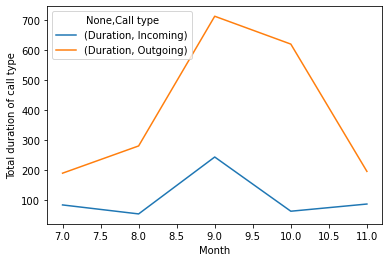

In [15]:
import matplotlib.pyplot as plt
tb.plot()
plt.ylabel('Total duration of call type')

One suspected thing for me is that, the number of outgoing calls increased dymatically in the month of September and October, while the number of incoming calls are a little bit higher than usual in September. If I am to investigate this person, I would put my focus on his/her actions in month of 9 and 10.

1.1.6

In [16]:
client_count = pd.DataFrame(call_count).rename(columns={"Number called (to/from)": "Count"})
client_count.head()

,Count
Number called (to/from),
A_1,111
A_5,48
B_3,28
A_4,12
B_2,4


<AxesSubplot:xlabel='Number called (to/from)'>

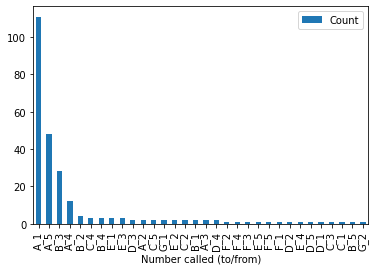

In [17]:
### NOT SURE ###
client_count.plot.bar()

Q2.The ergodicity problem in economics

2.3.1

In [5]:
import numpy as np
import pandas as pd
#np.random.randint(0, 2)
np.random.rand()

0.8504090933388644

In [6]:
"p"+ str(2)

'p2'

In [7]:
prob1 = []
for n in range(1,101):
        prob1.append(np.random.rand())
d = {'prob_1': prob1}
df_coin = pd.DataFrame(data=d)

for w in range(2,101):
    # iterate from second gambler
    prob = []
    for n in range(1,101):
        prob.append(np.random.rand())
    # colomn name
    col = 'prob_' + str(w)
    # new col for gambler w
    df_coin[col] = prob
        
        
df_coin        
        

,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,...,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99,prob_100
0,0.666327,0.029983,0.249506,0.690219,0.074729,0.372948,0.309996,0.977195,0.483655,0.113237,...,0.634381,0.854547,0.559870,0.276861,0.517133,0.516286,0.080194,0.582832,0.093579,0.122423
1,0.516909,0.698723,0.063560,0.382001,0.958935,0.141324,0.528263,0.487123,0.452207,0.805041,...,0.690508,0.512743,0.742202,0.690197,0.896866,0.435011,0.752196,0.510137,0.956476,0.361677
2,0.747243,0.297048,0.478322,0.757488,0.533590,0.179015,0.828373,0.687813,0.549984,0.971016,...,0.180027,0.676783,0.006760,0.791429,0.840702,0.421908,0.491125,0.679420,0.865631,0.718828
3,0.370021,0.516202,0.008937,0.571465,0.349025,0.745851,0.575707,0.665217,0.080382,0.293604,...,0.870744,0.750920,0.800501,0.146953,0.275552,0.119338,0.501153,0.188490,0.470400,0.823263
4,0.766623,0.086695,0.028630,0.041627,0.911820,0.697880,0.830650,0.673563,0.240527,0.627983,...,0.236701,0.999964,0.926465,0.855731,0.160919,0.238222,0.356363,0.841812,0.112894,0.020526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.005889,0.097400,0.324892,0.572510,0.417845,0.446152,0.874868,0.659777,0.122055,0.586242,...,0.312775,0.544784,0.071968,0.112119,0.351542,0.772997,0.390440,0.211506,0.659774,0.142708
96,0.178217,0.797787,0.461184,0.270989,0.191623,0.088330,0.242443,0.791982,0.087790,0.243154,...,0.592009,0.187953,0.677316,0.639183,0.519534,0.975928,0.397278,0.324041,0.164596,0.091835
97,0.857590,0.685914,0.552863,0.681639,0.909997,0.410261,0.505235,0.056875,0.284104,0.837311,...,0.728261,0.959650,0.076870,0.615049,0.984215,0.616234,0.416692,0.241134,0.933703,0.643528
98,0.229628,0.000492,0.802844,0.231568,0.198884,0.858256,0.726689,0.710125,0.785477,0.173713,...,0.600400,0.960699,0.570316,0.928939,0.875380,0.094003,0.309955,0.090672,0.508824,0.850365


Q2.3.2

In [8]:
import warnings
warnings.simplefilter("ignore")

In [9]:
for w in range(101,201):
    # colomn name
    col = 'balance_' + str(w-100)
    df_coin[col] = [100] * 100

df_coin

,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,...,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99,balance_100
0,0.666327,0.029983,0.249506,0.690219,0.074729,0.372948,0.309996,0.977195,0.483655,0.113237,...,100,100,100,100,100,100,100,100,100,100
1,0.516909,0.698723,0.063560,0.382001,0.958935,0.141324,0.528263,0.487123,0.452207,0.805041,...,100,100,100,100,100,100,100,100,100,100
2,0.747243,0.297048,0.478322,0.757488,0.533590,0.179015,0.828373,0.687813,0.549984,0.971016,...,100,100,100,100,100,100,100,100,100,100
3,0.370021,0.516202,0.008937,0.571465,0.349025,0.745851,0.575707,0.665217,0.080382,0.293604,...,100,100,100,100,100,100,100,100,100,100
4,0.766623,0.086695,0.028630,0.041627,0.911820,0.697880,0.830650,0.673563,0.240527,0.627983,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.005889,0.097400,0.324892,0.572510,0.417845,0.446152,0.874868,0.659777,0.122055,0.586242,...,100,100,100,100,100,100,100,100,100,100
96,0.178217,0.797787,0.461184,0.270989,0.191623,0.088330,0.242443,0.791982,0.087790,0.243154,...,100,100,100,100,100,100,100,100,100,100
97,0.857590,0.685914,0.552863,0.681639,0.909997,0.410261,0.505235,0.056875,0.284104,0.837311,...,100,100,100,100,100,100,100,100,100,100
98,0.229628,0.000492,0.802844,0.231568,0.198884,0.858256,0.726689,0.710125,0.785477,0.173713,...,100,100,100,100,100,100,100,100,100,100


Q2.3.3

In [10]:
# first row
for w in range(0,100):
    if df_coin.iloc[0].values[w]>=0.5:
        df_coin.at[0, 'balance_'+ str(w+1)] = 100*1.5
    else: # value < 0.5
        df_coin.at[0, 'balance_'+ str(w+1)] = 100*0.6


for n in range(1,100):
    for w in range(0,100):
        if df_coin.iloc[n].values[w]>=0.5:
            df_coin.at[n, 'balance_'+ str(w+1)] = df_coin.iloc[n-1].values[w+100] * 1.5
        else: # value < 0.5
            df_coin.at[n, 'balance_'+ str(w+1)] = df_coin.iloc[n-1].values[w+100] * 0.6

        
        
        
df_coin

,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,...,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99,balance_100
0,0.666327,0.029983,0.249506,0.690219,0.074729,0.372948,0.309996,0.977195,0.483655,0.113237,...,150.00000,150.000000,150.000000,60.000000,150.000000,150.000000,60.000000,150.000000,60.000000,60.000000
1,0.516909,0.698723,0.063560,0.382001,0.958935,0.141324,0.528263,0.487123,0.452207,0.805041,...,225.00000,225.000000,225.000000,90.000000,225.000000,90.000000,90.000000,225.000000,90.000000,36.000000
2,0.747243,0.297048,0.478322,0.757488,0.533590,0.179015,0.828373,0.687813,0.549984,0.971016,...,135.00000,337.500000,135.000000,135.000000,337.500000,54.000000,54.000000,337.500000,135.000000,54.000000
3,0.370021,0.516202,0.008937,0.571465,0.349025,0.745851,0.575707,0.665217,0.080382,0.293604,...,202.50000,506.250000,202.500000,81.000000,202.500000,32.400000,81.000000,202.500000,81.000000,81.000000
4,0.766623,0.086695,0.028630,0.041627,0.911820,0.697880,0.830650,0.673563,0.240527,0.627983,...,121.50000,759.375000,303.750000,121.500000,121.500000,19.440000,48.600000,303.750000,48.600000,48.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.005889,0.097400,0.324892,0.572510,0.417845,0.446152,0.874868,0.659777,0.122055,0.586242,...,24.85424,0.006515,0.254507,0.016288,0.254507,0.016288,0.040721,1.590671,0.006515,155.339000
96,0.178217,0.797787,0.461184,0.270989,0.191623,0.088330,0.242443,0.791982,0.087790,0.243154,...,37.28136,0.003909,0.381761,0.024433,0.381761,0.024433,0.024433,0.954403,0.003909,93.203400
97,0.857590,0.685914,0.552863,0.681639,0.909997,0.410261,0.505235,0.056875,0.284104,0.837311,...,55.92204,0.005864,0.229057,0.036649,0.572642,0.036649,0.014660,0.572642,0.005864,139.805100
98,0.229628,0.000492,0.802844,0.231568,0.198884,0.858256,0.726689,0.710125,0.785477,0.173713,...,83.88306,0.008796,0.343585,0.054974,0.858963,0.021989,0.008796,0.343585,0.008796,209.707650


Q2.3.4

Plot the time trajectories (in gamble iterations) of the wealth per gambler:

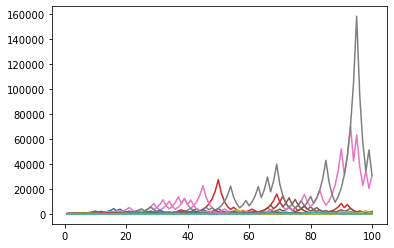

In [17]:
import matplotlib.pyplot as plt
time = list(range(1,101))
for w in range(1,101):
    plt.plot(time,df_coin['balance_'+ str(w)])
# plt.legend()
plt.show()
# wealth = []
# for n in range(0,100): #iterate through every turn
#     wealth.append(df_coin.iloc[n].values[101:200].mean())
# time = list(range(1,101))
# plt.plot(time, wealth)

N = 100, w = 100: calculate how many gamblers have more than their initial 100$

In [18]:

count = 0
for w in range(100,200):
    if df_coin.iloc[99].values[w] > 100:
        count+=1
count

14

Now we want to increase N from 100 to 1000

In [28]:
### create new dataframe
prob1 = []
for n in range(1,1001):
        prob1.append(np.random.rand())
d = {'prob_1': prob1}
df_coin2 = pd.DataFrame(data=d)

for w in range(2,101):
    # iterate from second gambler
    prob = []
    for n in range(1,1001):
        prob.append(np.random.rand())
    # colomn name
    col = 'prob_' + str(w)
    # new col for gambler w
    df_coin2[col] = prob

### fill in initial wealth
for w in range(101,201):
    # colomn name
    col = 'balance_' + str(w-100)
    df_coin2[col] = [100] * 1000

### fill in wealth per iteration
for w in range(0,100):
    if df_coin2.iloc[0].values[w]>=0.5:
        df_coin2.at[0, 'balance_'+ str(w+1)] = 100*1.5
    else: # value < 0.5
        df_coin2.at[0, 'balance_'+ str(w+1)] = 100*0.6


for n in range(1,1000):
    for w in range(0,100):
        if df_coin2.iloc[n].values[w]>=0.5:
            df_coin2.at[n, 'balance_'+ str(w+1)] = df_coin2.iloc[n-1].values[w+100] * 1.5
        else: # value < 0.5
            df_coin2.at[n, 'balance_'+ str(w+1)] = df_coin2.iloc[n-1].values[w+100] * 0.6
    
    
df_coin2
        


,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,...,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99,balance_100
0,0.305390,0.230342,0.583858,0.625158,0.040339,0.799980,0.472681,0.009743,0.796241,0.153600,...,6.000000e+01,6.000000e+01,1.500000e+02,6.000000e+01,6.000000e+01,1.500000e+02,6.000000e+01,1.500000e+02,6.000000e+01,6.000000e+01
1,0.859892,0.907020,0.954738,0.294021,0.023685,0.370383,0.382092,0.622384,0.020906,0.843594,...,9.000000e+01,9.000000e+01,9.000000e+01,3.600000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,3.600000e+01,9.000000e+01
2,0.342152,0.424461,0.208137,0.120293,0.502678,0.272347,0.376430,0.642971,0.421489,0.024520,...,1.350000e+02,1.350000e+02,5.400000e+01,5.400000e+01,1.350000e+02,1.350000e+02,1.350000e+02,5.400000e+01,2.160000e+01,5.400000e+01
3,0.598226,0.908125,0.903357,0.314280,0.858804,0.720854,0.428196,0.419298,0.835195,0.892489,...,8.100000e+01,2.025000e+02,3.240000e+01,8.100000e+01,2.025000e+02,2.025000e+02,2.025000e+02,8.100000e+01,3.240000e+01,8.100000e+01
4,0.177222,0.193937,0.325941,0.226620,0.387454,0.467236,0.721634,0.678074,0.960604,0.606946,...,1.215000e+02,3.037500e+02,4.860000e+01,4.860000e+01,3.037500e+02,1.215000e+02,1.215000e+02,4.860000e+01,4.860000e+01,4.860000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.395841,0.616996,0.994373,0.453889,0.530168,0.153690,0.654762,0.940900,0.908870,0.867914,...,9.962074e-19,5.798690e-12,6.685435e-24,3.800230e-15,1.632186e-21,6.685435e-24,9.962074e-19,2.674174e-24,1.632186e-21,9.728588e-17
996,0.925940,0.278919,0.437104,0.469652,0.348525,0.526931,0.912644,0.856215,0.113423,0.283049,...,1.494311e-18,8.698035e-12,1.002815e-23,5.700344e-15,2.448279e-21,4.011261e-24,1.494311e-18,1.604504e-24,2.448279e-21,1.459288e-16
997,0.613378,0.864818,0.328953,0.275322,0.199630,0.461290,0.762542,0.507894,0.200494,0.189321,...,2.241467e-18,1.304705e-11,1.504223e-23,8.550517e-15,3.672419e-21,6.016891e-24,8.965867e-19,9.627026e-25,1.468968e-21,2.188932e-16
998,0.777263,0.780720,0.187857,0.904246,0.526288,0.796118,0.600960,0.381970,0.038182,0.435971,...,3.362200e-18,1.957058e-11,2.256334e-23,1.282577e-14,5.508628e-21,9.025337e-24,1.344880e-18,5.776216e-25,2.203451e-21,3.283398e-16


How many gamblers with more than 100$ do you have at t=1,000?

In [29]:
count = 0
for w in range(100,200):
    if df_coin2.iloc[999].values[w] > 100:
        count+=1
count

0

Q2.3.5

Text(0.5, 1.0, 'mean welth vs time')

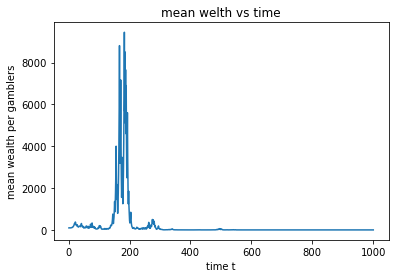

In [30]:
wealth = []
for n in range(0,1000): #iterate through every turn
    wealth.append(df_coin2.iloc[n].values[101:200].mean())
time = list(range(1,1001))
plt.plot(time, wealth)
plt.xlabel('time t')
plt.ylabel('mean wealth per gamblers')
plt.title('mean welth vs time')

Text(0.5, 1.0, 'mean welth vs time with logarithmic scaler')

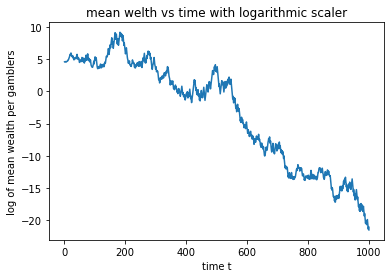

In [31]:
from math import log
wealth_log = [log(x) for x in wealth]
plt.plot(time, wealth_log)
plt.xlabel('time t')
plt.ylabel('log of mean wealth per gamblers')
plt.title('mean welth vs time with logarithmic scaler')

Text(0.5, 1.0, 'median welth vs time')

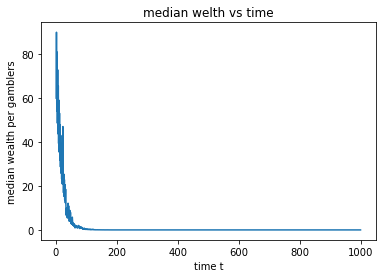

In [32]:
import statistics
wealth = []
for n in range(0,1000): #iterate through every turn
    wealth.append(statistics.median(df_coin2.iloc[n].values[101:200]))
time = list(range(1,1001))
plt.plot(time, wealth)
plt.xlabel('time t')
plt.ylabel('median wealth per gamblers')
plt.title('median welth vs time')

Text(0.5, 1.0, 'median welth vs time with logarithmic scaler')

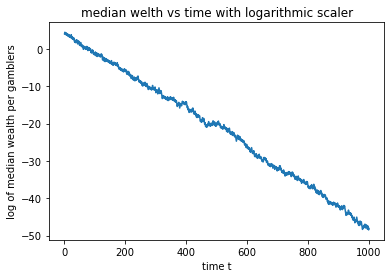

In [33]:
wealth_log = [log(x) for x in wealth]
plt.plot(time, wealth_log)
plt.xlabel('time t')
plt.ylabel('log of median wealth per gamblers')
plt.title('median welth vs time with logarithmic scaler')

What are your observations?

From the above graphs, we can observe that, the mean wealth per gamblers generally increased from t = 0, and the mean value peak at around t = 100 to 200, but it keep decreasing unstably after that. When t is around 1000, mean wealth is extremly small at round e-20.

On the other hand, the change of median wealth seems more stable, it keep decreasing at an exponential speed from t = 0 to t = 1000.


The reason why median wealth change more smoothly is that mean value is effected by outliers that are very large, in this case, some incredibly lucky gamblers gains a lot, and they contribute a lot to mean value. While median wealth is unlikely to be affected by "incredibly lucky gamblers".

In this problem, our expected return is +0.1x, but we resulted in loss of balance(negative return), so I would say that this problem is not ergodic.

Q2.3.6

In [34]:
### Dataframe with N=10, w=1000 ###

prob1 = []
for i in range(1,11):
        prob1.append(np.random.rand())
d = {'prob_1': prob1}
df_coin3 = pd.DataFrame(data=d)

for w in range(2,1001):
    # iterate from second gambler
    prob = []
    for n in range(1,11):
        prob.append(np.random.rand())
    # colomn name
    col = 'prob_' + str(w)
    # new col for gambler w
    df_coin3[col] = prob

df_coin3
        

,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,...,prob_991,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999,prob_1000
0,0.067723,0.066904,0.806784,0.557918,0.933145,0.601039,0.583672,0.046042,0.631996,0.846086,...,0.556073,0.932438,0.410112,0.216116,0.685644,0.638926,0.914661,0.558937,0.321066,0.891370
1,0.127413,0.189792,0.698815,0.330076,0.680288,0.925943,0.993266,0.551778,0.317427,0.886050,...,0.344658,0.414226,0.855017,0.517480,0.595059,0.230221,0.127560,0.088458,0.909805,0.333700
2,0.108749,0.673309,0.201470,0.901073,0.438122,0.809817,0.982340,0.724524,0.472912,0.278248,...,0.191251,0.127261,0.273718,0.321030,0.510130,0.546876,0.574292,0.588597,0.863881,0.716705
3,0.405197,0.374587,0.759286,0.549450,0.885851,0.446665,0.536979,0.736962,0.855820,0.858559,...,0.370989,0.216818,0.349128,0.905524,0.912814,0.096632,0.149018,0.703466,0.933666,0.524977
4,0.695798,0.477135,0.182201,0.711204,0.974713,0.333346,0.231475,0.074059,0.102233,0.836960,...,0.925815,0.707153,0.412085,0.347882,0.079960,0.946780,0.237246,0.979489,0.336838,0.233199
5,0.080448,0.236139,0.898709,0.009311,0.245173,0.537510,0.913504,0.181906,0.360954,0.384880,...,0.051374,0.012294,0.988387,0.083662,0.535225,0.098532,0.318979,0.682531,0.140572,0.684912
6,0.777295,0.026865,0.588996,0.098196,0.836019,0.598522,0.964025,0.573357,0.427736,0.334136,...,0.127515,0.703993,0.570854,0.668790,0.853638,0.533001,0.455634,0.524876,0.734932,0.672432
7,0.303685,0.095931,0.616399,0.274788,0.926242,0.653539,0.618870,0.558588,0.102175,0.728691,...,0.784376,0.021262,0.681365,0.383398,0.753408,0.890572,0.932675,0.506571,0.157305,0.896614
8,0.979117,0.614220,0.656930,0.298270,0.730079,0.696858,0.773477,0.942434,0.521340,0.059488,...,0.621169,0.216199,0.989209,0.834092,0.774017,0.848868,0.196009,0.087004,0.434701,0.051610
9,0.580207,0.965003,0.037398,0.185904,0.822163,0.106278,0.736058,0.809429,0.162707,0.862380,...,0.438033,0.982886,0.859852,0.588657,0.783593,0.949036,0.287780,0.341056,0.226345,0.139681


In [35]:
### fill in initial wealth ###
for w in range(1001,2001):
    # colomn name
    col = 'balance_' + str(w-1000)
    df_coin3[col] = [100] * 10

### fill in wealth per iteration ###
for w in range(0,1000):
    if df_coin3.iloc[0].values[w]>=0.5:
        df_coin3.at[0, 'balance_'+ str(w+1)] = 100+50
    else: # value < 0.5
        df_coin3.at[0, 'balance_'+ str(w+1)] = 100-40


for n in range(1,10):
    for w in range(0,1000):
        if df_coin3.iloc[n].values[w]>=0.5:
            df_coin3.at[n, 'balance_'+ str(w+1)] = df_coin3.iloc[n-1].values[w+1000] + 50
        else: # value < 0.5
            df_coin3.at[n, 'balance_'+ str(w+1)] = df_coin3.iloc[n-1].values[w+1000] - 40
    
    
df_coin3
        

,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,...,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999,balance_1000
0,0.067723,0.066904,0.806784,0.557918,0.933145,0.601039,0.583672,0.046042,0.631996,0.846086,...,150,150,60,60,150,150,150,150,60,150
1,0.127413,0.189792,0.698815,0.330076,0.680288,0.925943,0.993266,0.551778,0.317427,0.886050,...,110,110,110,110,200,110,110,110,110,110
2,0.108749,0.673309,0.201470,0.901073,0.438122,0.809817,0.982340,0.724524,0.472912,0.278248,...,70,70,70,70,250,160,160,160,160,160
3,0.405197,0.374587,0.759286,0.549450,0.885851,0.446665,0.536979,0.736962,0.855820,0.858559,...,30,30,30,120,300,120,120,210,210,210
4,0.695798,0.477135,0.182201,0.711204,0.974713,0.333346,0.231475,0.074059,0.102233,0.836960,...,80,80,-10,80,260,170,80,260,170,170
5,0.080448,0.236139,0.898709,0.009311,0.245173,0.537510,0.913504,0.181906,0.360954,0.384880,...,40,40,40,40,310,130,40,310,130,220
6,0.777295,0.026865,0.588996,0.098196,0.836019,0.598522,0.964025,0.573357,0.427736,0.334136,...,0,90,90,90,360,180,0,360,180,270
7,0.303685,0.095931,0.616399,0.274788,0.926242,0.653539,0.618870,0.558588,0.102175,0.728691,...,50,50,140,50,410,230,50,410,140,320
8,0.979117,0.614220,0.656930,0.298270,0.730079,0.696858,0.773477,0.942434,0.521340,0.059488,...,100,10,190,100,460,280,10,370,100,280
9,0.580207,0.965003,0.037398,0.185904,0.822163,0.106278,0.736058,0.809429,0.162707,0.862380,...,60,60,240,150,510,330,-30,330,60,240


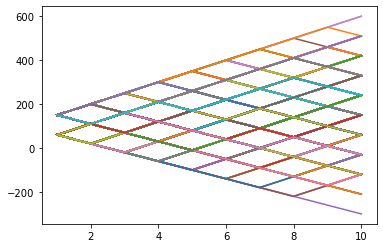

In [39]:
## Step 4 wealth per gambler
import matplotlib.pyplot as plt
time = list(range(1,11))
for w in range(1,1001):
    plt.plot(time,df_coin3['balance_'+ str(w)])

In [40]:
### How many gamblers with more than 100$
count = 0
for w in range(1000,2000):
    if df_coin3.iloc[9].values[w] > 100:
        count+=1
count
print(count,'out of 1000 gamblers has more than $100')

626 out of 1000 gamblers has more than $100


Text(0.5, 1.0, 'mean welth vs time')

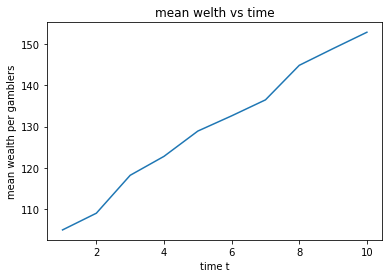

In [41]:
wealth = []
for n in range(0,10): #iterate through every turn
    wealth.append(df_coin3.iloc[n].values[1001:2000].mean())
time = list(range(1,11))
plt.plot(time, wealth)
plt.ylabel('mean wealth per gamblers')
plt.xlabel('time t')
plt.title('mean welth vs time')

Text(0.5, 1.0, 'mean welth vs time with logarithmic scaler')

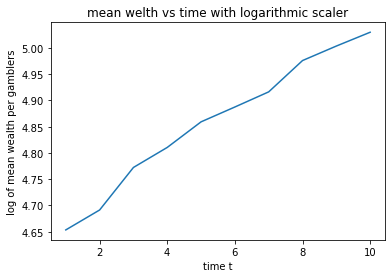

In [42]:
from math import log
wealth_log = [log(x) for x in wealth]
plt.plot(time, wealth_log)
plt.ylabel('log of mean wealth per gamblers')
plt.xlabel('time t')
plt.title('mean welth vs time with logarithmic scaler')

Text(0.5, 1.0, 'median welth vs time')

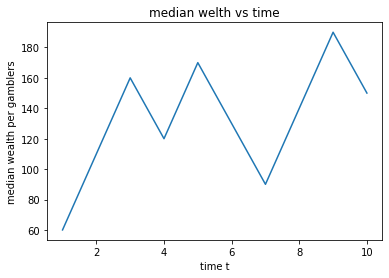

In [43]:
import statistics
wealth = []
for n in range(0,10): #iterate through every turn
    wealth.append(statistics.median(df_coin3.iloc[n].values[1001:2000]))
time = list(range(1,11))
plt.plot(time, wealth)
plt.ylabel('median wealth per gamblers')
plt.xlabel('time t')
plt.title('median welth vs time')

Text(0.5, 1.0, 'median welth vs time with logarithmic scaler')

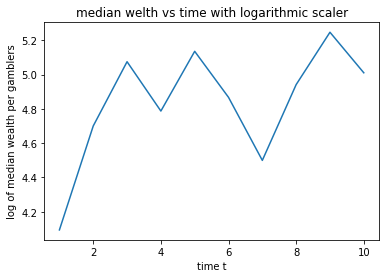

In [44]:
wealth_log = [log(x) for x in wealth]
plt.plot(time, wealth_log)
plt.xlabel('time t')
plt.ylabel('log of median wealth per gamblers')
plt.title('median welth vs time with logarithmic scaler')

How are the results different than the previous logic?

Here, we can observe that the average mean wealth increases over time. Among the 1000 gamblers, average wealth increased by about 50 in 10 bets, average gain per bet is 50/10 = 5, which is equal to expected gain per toss -- 50 * 0.5 + (-40) * 0.5 = 5. Therefore, I would conclude that in this seond logic, time average equals expectation value, this problem is ergodic. While for the first logic, our expected return is positive, but average wealth over time decreses, so it is not ergodicity.

On the other hand, the median wealth is fluctuated over time, but also showing an increasing trend, which is consistent with my previous guess with ergodicity.